In [1]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
import datetime as dt

In [2]:
trips=pd.read_csv("trip.csv")
#trips=trips_all.loc[trips_all.start_date.str.contains('4/'+'\S'+'/2014')]
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [3]:
trips['start_date'] = pd.to_datetime((trips['start_date']))
trips['dayofweek'] = trips.start_date.dt.dayofweek #nro 5 es sabado, 6 es domingo
trips['numero_mes'] = trips.start_date.dt.month
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,dayofweek,numero_mes
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,3,8
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,3,8
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,3,8
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,3,8
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,3,8


In [4]:
trips_weekend = trips[(trips['dayofweek']==5) | (trips['dayofweek']==6)]
#trips_weekend_6 = trips[(trips['dayofweek']==6)]
#trips_weekend = pd.concat([trips_weekend_5, trips_weekend_6], axis=0)

In [5]:
viajes_total=trips_weekend['id'].count()
viajes_subscribers=trips_weekend[trips_weekend['subscription_type']=='Subscriber']['id'].count()
viajes_customers=trips_weekend[trips_weekend['subscription_type']=='Customer']['id'].count()

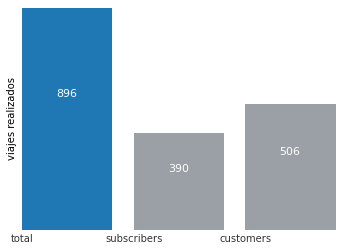

In [126]:
%matplotlib inline
plot.figure()
users=['total','subscribers','customers']
cantidad=[viajes_total,viajes_subscribers,viajes_customers]
pos = np.arange(len(users))

bars=plot.bar(pos,cantidad)
plot.xticks(pos,users)
plot.ylabel('viajes realizados')

plot.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

for spine in plot.gca().spines.values():
    spine.set_visible(False)

# make one bar a contrasting color

bars[0].set_color('#1F77B4')
bars[1].set_color('#9AA0A6')
bars[2].set_color('#9AA0A6')

# soften all labels by turning grey
plot.xticks(pos, users, alpha=0.8)
    
# direct label each bar with Y axis values
for bar in bars:
    plot.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - bar.get_height()*0.40 , str(int(bar.get_height())) ,ha='center', color='w', fontsize=11,zorder=20)
    
plot.show()

In [8]:
#Ahora porcentaje total del archivo:
trips['start_date'] = pd.to_datetime((trips['start_date']))
trips['dayofweek'] = trips.start_date.dt.dayofweek
trips['numero_mes'] = trips.start_date.dt.month
trips = trips[(trips['dayofweek']==5) | (trips['dayofweek']==6)]

trips_S = trips[(trips['subscription_type']=='Subscriber')]
trips_C = trips[(trips['subscription_type']=='Customer')]

#viajes_total_S=trips_S[trips_S['numero_mes']==1]['id'].count()
#viajes_total_C=trips_C[trips_C['numero_mes']==1]['id'].count()
#viajes_total_S, viajes_total_C
#hay que unir los que tienen cada mes
#hay que hacer una lista? o hay forma de juntarlos? creo que hay que hacer calve-valor

#Grafico con puntitos, de bicicletas usadas por S y C en fin de semana. Puede ser por hora o solo por mes directo
cantidad_viajes_S=trips_S[['numero_mes','id']].groupby('numero_mes').count()
cantidad_viajes_C=trips_C[['numero_mes','id']].groupby('numero_mes').count()
cantidad_viajes_totales = trips[['numero_mes','id']].groupby('numero_mes').count()


#viajes_total=trips_weekend['id'].count()
#viajes_subscribers=trips_weekend[trips_weekend['subscription_type']=='Subscriber']['id'].count()
#viajes_customers=trips_weekend[trips_weekend['subscription_type']=='Customer']['id'].count()

#porcentaje_subscribers = viajes_subscribers*100/viajes_total
#porcentaje_customers = viajes_customers*100/viajes_total
#print 'Porcentaje suscriptores: ',porcentaje_subscribers,'\nPorcentaje no suscriptores: ', porcentaje_customers


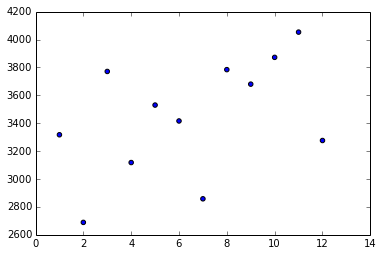

In [135]:
plot.scatter(cantidad_viajes_S.index, cantidad_viajes_S.loc[:,'id'])
#plot.scatter(meses,cantidad_viajes_en_mes )

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name=u'numero_mes')

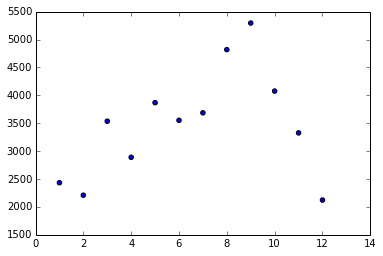

In [34]:
plot.scatter(cantidad_viajes_C.index, cantidad_viajes_C.loc[:,'id'])
cantidad_viajes_C.index

DatetimeIndex(['2013-08-31 00:23:00', '2013-08-31 00:39:00',
               '2013-08-31 02:07:00', '2013-08-31 06:30:00',
               '2013-08-31 07:47:00', '2013-08-31 08:01:00',
               '2013-08-31 08:25:00', '2013-08-31 08:27:00',
               '2013-08-31 08:38:00', '2013-08-31 08:52:00',
               ...
               '2015-08-30 20:12:00', '2015-08-30 20:13:00',
               '2015-08-30 20:41:00', '2015-08-30 21:16:00',
               '2015-08-30 21:43:00', '2015-08-30 21:52:00',
               '2015-08-30 22:47:00', '2015-08-30 22:58:00',
               '2015-08-30 23:09:00', '2015-08-30 23:42:00'],
              dtype='datetime64[ns]', name=u'start_date', length=35403, freq=None)

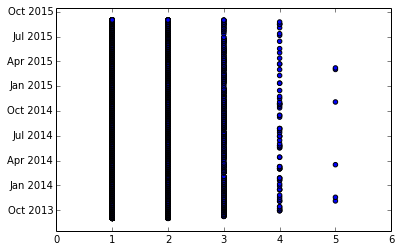

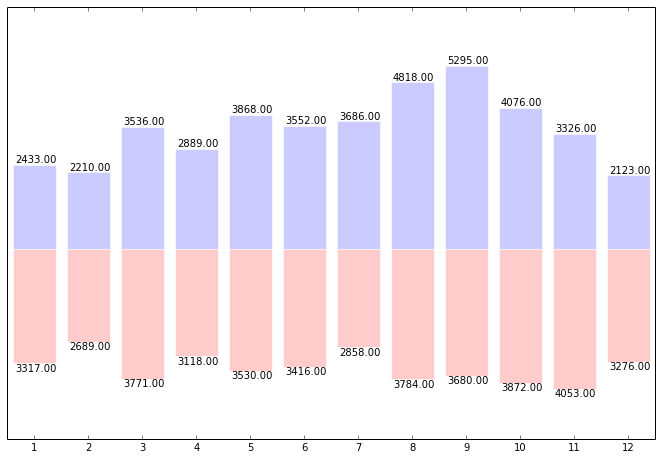

In [35]:
X = np.arange(len(cantidad_viajes_C.index))
Y1 = cantidad_viajes_C.loc[:,'id']
Y2 = cantidad_viajes_S.loc[:,'id']

plot.axes([0.025, 0.025, 1.5, 1.5])
plot.bar(X, Y1, facecolor='#9999ff', edgecolor='white', align="center", alpha=.5) #no subscriptos
plot.bar(X, -Y2, facecolor='#ff9999', edgecolor='white', align="center", alpha=.5) #subscriptos

for x, y in zip(X, Y1):
    plot.text(x + 0.4, y + 0.05, '%.2f' % y, ha='right', va= 'bottom')

for x, y in zip(X, Y2):
    plot.text(x + 0.4, -y - 0.05, '%.2f' % y, ha='right', va= 'top')


plot.xlim(-.5,len(cantidad_viajes_C.index)-0.5)
plot.xticks(X, cantidad_viajes_C.index)

plot.ylim(-5500, 7000) #solo para que quede lindo, igual deberia ser segun los valores blabla..
plot.yticks(())

plot.show()

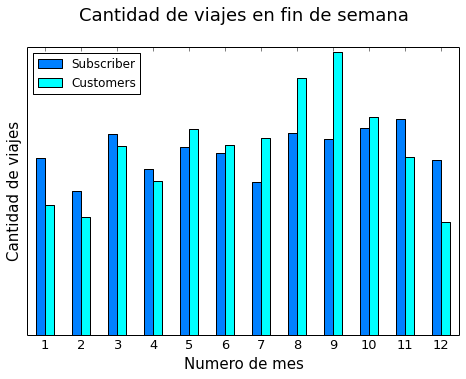

In [14]:
%matplotlib inline
from numpy import ma

X = np.arange(len(cantidad_viajes_C.index))
Y1 = cantidad_viajes_C.loc[:,'id']
Y2 = cantidad_viajes_S.loc[:,'id']
Y3 = cantidad_viajes_totales.loc[:,'id']

plot.axes([0.025, 0.025, 1, 1])
#plot.bar(X + 0.25, Y3, width = 0.5, align="center")
plot.bar(X -.12, Y2, facecolor='#0080FF',   width = 0.25, align="center",label="Subscriber") #subscriptos, rojo
plot.bar(X , Y1, facecolor='#00FFFF',   width = 0.25,  label="Customers") #no subscriptos, azul #alpha es la opacidad



#for x, y in zip(X, Y1):
#    plot.text(x + 0.4, y + 0.05, '%.2f' % y, ha='right', va= 'bottom')

#for x, y in zip(X, Y2):
#    plot.text(x + 0.4, y + 0.05, '%.2f' % y, ha='right', va= 'top')

plot.xlim(-.5,len(cantidad_viajes_C.index)-0.5)
plot.xticks(X, cantidad_viajes_C.index, fontsize = 13)
plot.xlabel('Numero de mes', fontsize = 15)

plot.ylim(0, 5400) #solo para que quede lindo, igual deberia ser segun los valores blabla..
plot.yticks(())
plot.ylabel('Cantidad de viajes', fontsize = 15)

plot.title('Cantidad de viajes en fin de semana\n', fontsize = 18)

plot.legend(loc="upper left")
plot.show()